# Geographic Visualization of Spotify Data 

## 01 Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
%matplotlib inline 

In [2]:
import folium

In [3]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [4]:
# Import ".json" file for the Country, State and City Data 
geo_data = open('/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project/01 Data/01 Original Data/us-states.json')

In [5]:
# returns JSON object as a dictionary
data = json.load(geo_data)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
# Import most recent dataframe 
df = pd.read_pickle(os.path.join(path,'01 Data','02 Prepared Data','data_with_counts.pkl'))

In [7]:
df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,region,minutes_seconds,year,month,day_of_week,hour_of_day,skipped_ratio,skip_prob,count_y,listening_frequency
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,Pennsylvania,03:51,2012,7,1,2,inf,very likely to be skipped,3.0,Low Frequency
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,Pennsylvania,00:25,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,Pennsylvania,00:03,2012,7,1,22,2.0,very likely to be skipped,5.0,Low Frequency
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once


In [8]:
df.shape

(173285, 28)

In [9]:
df['conn_country'].value_counts()

US    172116
ZZ      1164
JO         5
Name: conn_country, dtype: int64

# The ZZ location means the country is unknown, and JO is for Jordan, which I've not traveled to.  I'm going to remove these entries for this portion as they aren't especially relevant and take up a small portion of the dataset.

## 02 Data Wrangling

In [10]:
# dropping ZZ and JO country entries 
df = df.drop(df[df['conn_country'] == 'ZZ'].index)

In [11]:
df = df.drop(df[df['conn_country'] == 'JO'].index)

In [12]:
df.shape

(172116, 28)

In [13]:
df['conn_country'].value_counts(dropna=False)

US    172116
Name: conn_country, dtype: int64

In [14]:
# creating a subset of the dataset 
df_sub = df[['master_metadata_track_name', 'region']]

In [15]:
df_sub.head()

,master_metadata_track_name,region
0,It's Time,Pennsylvania
1,Jump (feat. Nelly Furtado),Pennsylvania
2,I Know You Want Me (Calle Ocho),Pennsylvania
3,Over And Over,Pennsylvania
4,Pause,Pennsylvania


In [16]:
df_sub.shape

(172116, 2)

In [17]:
df_sub['region'].isnull().sum()

0

<Axes: >

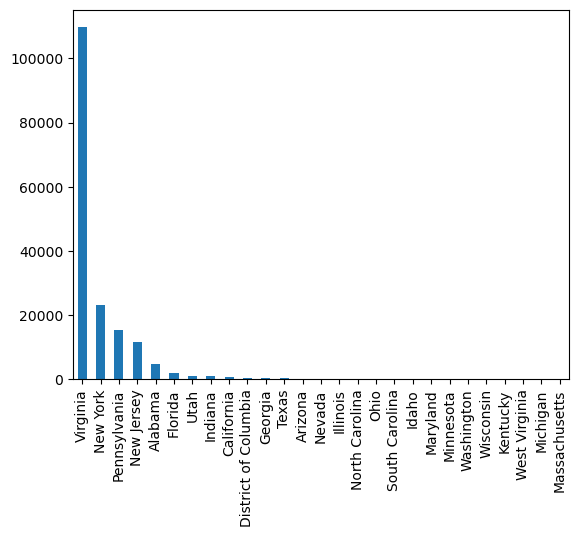

In [18]:
df_sub['region'].value_counts().plot.bar()

##  Because I primarily live in Virginia, the results are unsurprising, so I see no additional need for data cleaning 

## Aggregating track counts by state

In [19]:
grouped = df_sub.groupby(['region']).size().reset_index(name='track_count')


In [20]:
grouped

,region,track_count
0,Alabama,4844
1,Arizona,235
2,California,617
3,District of Columbia,405
4,Florida,2025
5,Georgia,394
6,Idaho,108
7,Illinois,217
8,Indiana,902
9,Kentucky,36


## Creating a Choropleth 

In [21]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = data, 
    data = grouped,
    columns = ['region', 'track_count'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "track_count").add_to(map)

folium.LayerControl().add_to(map)

map

## Exporting Map 

In [22]:
map.save(os.path.join(path, '03 Analysis and Visualizations', 'choropleth.html'))

In [23]:
df.to_csv(os.path.join(path, '01 Data', '02 Prepared Data', 'df_6.csv'))

## The results of this Choropleth aren't necessarily surprising, given I know my travel and living history, but it provides a helpful visualization of where my listening took place.  It should be noted, however, that the locations in my data were derived from IP addresses, so it's not a perfect representation.  For instance, I haven't been to a few of the states included, but knowing the nature of IP addresses, it's not uncommon for them to show states that I wasn't necessarily in because of proxies or VPNs.  

## In general, though, I live in Virginia, and work for a company stationed in New York, so the location history is accurate with regard to where most of my listening would have occured.  This type of visualization doesn't lead me to any new research questions or provide a ton of additional context, but it's a helpful tool to visualize where my listening was recorded.  